# Wind Rose

A wind rose is a graphic tool used by meteorologists to give a succinct view of how wind speed and direction are typically distributed at a particular location. Historically, wind roses were predecessors of the compass rose, as there was no differentiation between a cardinal direction and the wind which blew from such a direction. Using a polar coordinate system of gridding, the frequency of winds over a time period is plotted by wind direction, with color bands showing wind speed ranges. The direction of the longest spoke shows the wind direction with the greatest frequency (https://en.wikipedia.org/wiki/Wind_rose).

This notebook is extracted from the python package of [windrose](https://github.com/python-windrose/windrose) with a little bit modification. Please refer to the original windrose’s documentation for more information.

## 1. Load all needed libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
from math import pi

from windrose import WindroseAxes, WindAxes, plot_windrose

from pylab import rcParams
rcParams['figure.figsize'] = 6, 6

## 2. Load wind time series data

In [3]:
df = pd.read_csv("data/sample_wind_poitiers.csv", parse_dates=['Timestamp'])
df = df.set_index('Timestamp')
df.head()

,speed,direction
Timestamp,,
2011-03-07 17:30:00,3.6,91.0
2011-03-07 17:40:00,5.6,92.0
2011-03-07 17:50:00,4.9,92.0
2011-03-07 18:00:00,2.3,113.0
2011-03-07 18:10:00,3.2,84.0


In [4]:
df.index[0:5]

DatetimeIndex(['2011-03-07 17:30:00', '2011-03-07 17:40:00',
               '2011-03-07 17:50:00', '2011-03-07 18:00:00',
               '2011-03-07 18:10:00'],
              dtype='datetime64[ns]', name=u'Timestamp', freq=None)

### 2.1 Convert wind from speed and direction to u-wind and v-wind

In [5]:
df['speed_x'] = df['speed'] * np.sin(df['direction'] * pi / 180.0)
df['speed_y'] = df['speed'] * np.cos(df['direction'] * pi / 180.0)

## 3. Visualization
### 3.1 Have a quick shot

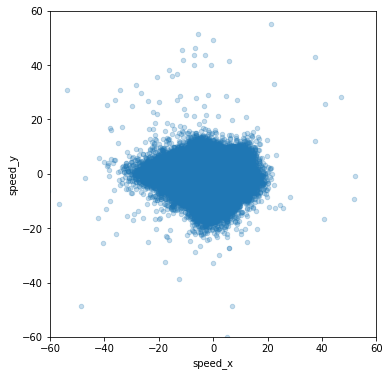

In [6]:
fig, ax = plt.subplots()
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
_ = df.plot(kind='scatter', x='speed_x', y='speed_y', alpha=0.25, ax=ax)
Vw = 60
_ = ax.set_xlim([-Vw, Vw])
_ = ax.set_ylim([-Vw, Vw])

### 3.2 Stacked histogram with normed (displayed in percent)

C:\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in rint
  return getattr(obj, method)(*args, **kwds)


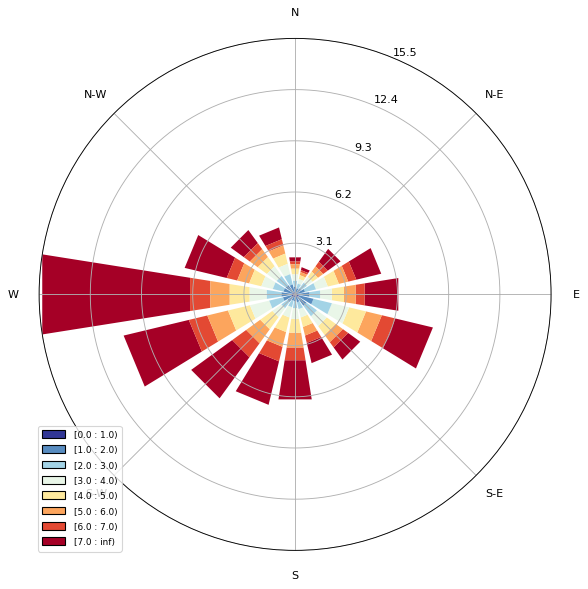

In [7]:
ax = WindroseAxes.from_ax()
ax.bar(df.direction.values, df.speed.values, normed=True, bins=np.arange(0.01,8,1), cmap=cm.RdYlBu_r, lw=3)
ax.set_legend()

### 3.3 Contour representation with normed (displayed in percent)

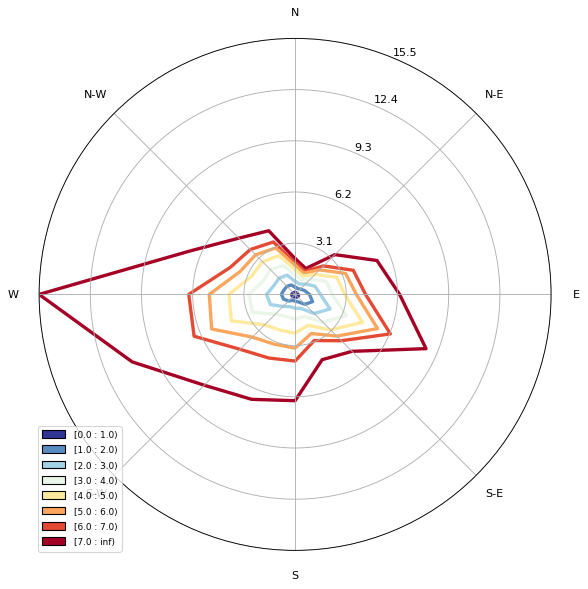

In [8]:
_ = plot_windrose(df, kind='contour', normed=True, bins=np.arange(0.01,8,1), cmap=cm.RdYlBu_r, lw=3)

### 3.4 Probability density function (pdf) and fitting Weibull distribution

In [9]:
bins = np.arange(0,30+1,1)
bins = bins[1:]
bins

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

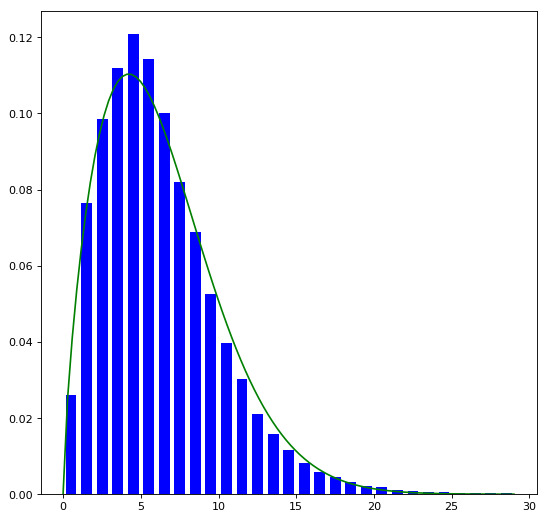

In [10]:
_ = plot_windrose(df, kind='pdf', bins=np.arange(0.01,30,1))

In [11]:
data = np.histogram(df['speed'], bins=bins)[0]
data

array([15377, 20041, 23987, 24356, 24041, 21238, 18007, 14144, 11328,
        8461,  6551,  4625,  3265,  2523,  1749,  1294,   922,   686,
         463,   362,   267,   195,   128,   117,    77,    52,    52,
          40,    29], dtype=int64)

### 3.5 Wind rose for a specific month

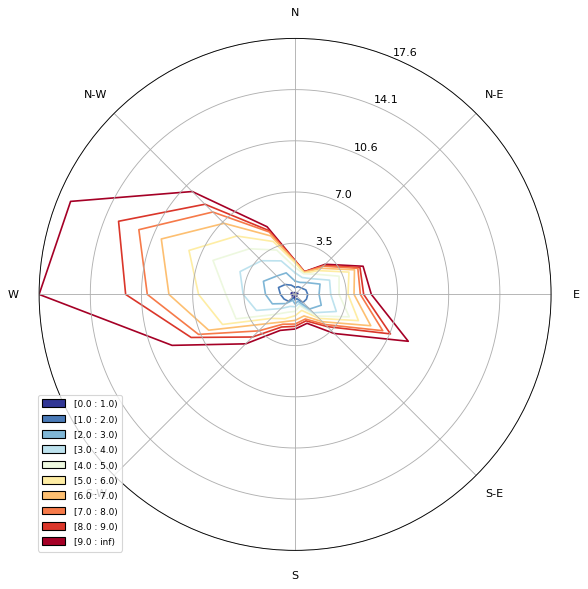

In [12]:
def plot_month(df, t_year_month, *args, **kwargs):
    by = 'year_month'
    df[by] = df.index.map(lambda x: x.year*100+x.month) 
    df_month = df[df[by] == t_year_month[0]*100+t_year_month[1]]
    ax = plot_windrose(df_month, *args, **kwargs)
    return ax

#### 3.5.1 July 2014

In [ ]:
plot_month(df, (2014, 7), kind='contour', normed=True,bins=np.arange(0, 10, 1), cmap=cm.RdYlBu_r)

#### 3.5.2 August 2014

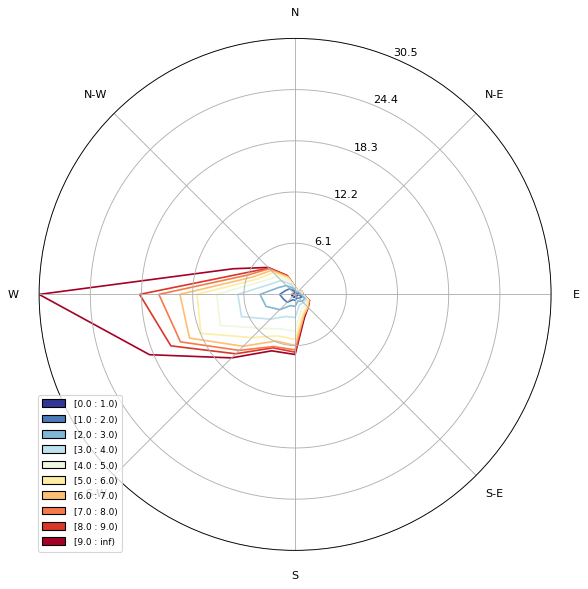

In [13]:
plot_month(df, (2014, 8), kind='contour', normed=True,bins=np.arange(0, 10, 1), cmap=cm.RdYlBu_r)

#### 3.5.3 Septemer 2014

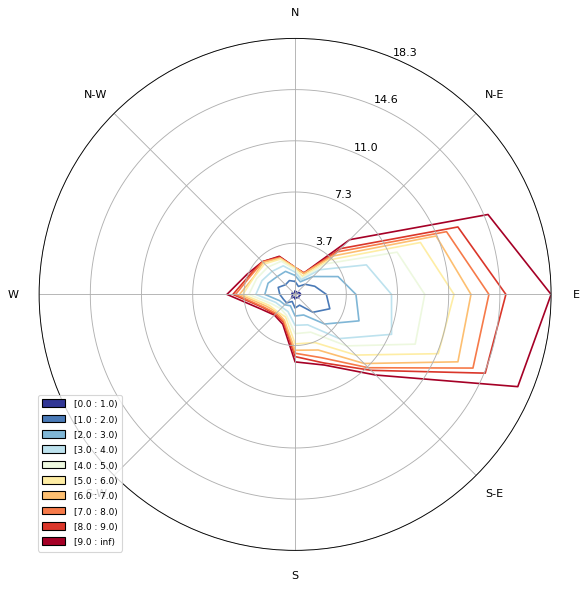

In [14]:
plot_month(df, (2014, 9), kind='contour', normed=True, bins=np.arange(0, 10, 1), cmap=cm.RdYlBu_r)

## References

Dan Reboussin (2005). Wind Rose. University of Florida. Retrieved on 2009-04-26.

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37